In [1]:
import pyedflib
import connectivipy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 10000)
import bct

In [2]:
def import_data(filename):
    f = pyedflib.EdfReader(filename)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    signal_labels = [sl.replace('.','') for sl in signal_labels]
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    return sigbufs, signal_labels

In [3]:
eyes_open, olabels = import_data('D:/DataScience/BI/HW03/S059R01.edf')
eyes_closed, clabels  = import_data('D:/DataScience/BI/HW03/S059R02.edf')
# pdc
Ao_pdc = np.loadtxt('D:/DataScience/BI/HW03/Ao_pdc.txt')
Go_pdc = nx.from_numpy_matrix(Ao_pdc, create_using=nx.DiGraph())
Ac_pdc = np.loadtxt('D:/DataScience/BI/HW03/Ac_pdc.txt')
Gc_pdc = nx.from_numpy_matrix(Ac_pdc, create_using=nx.DiGraph())
Go_pdc_undirected = Go_pdc.to_undirected()
Gc_pdc_undirected = Gc_pdc.to_undirected()
# dtf
Ao_dtf = np.loadtxt('D:/DataScience/BI/HW03/Ao_dtf.txt')
Go_dtf = nx.from_numpy_matrix(Ao_dtf, create_using=nx.DiGraph())
Ac_dtf = np.loadtxt('D:/DataScience/BI/HW03/Ac_dtf.txt')
Gc_dtf = nx.from_numpy_matrix(Ac_dtf, create_using=nx.DiGraph())
Go_dtf_undirected = Go_dtf.to_undirected()
Gc_dtf_undirected = Gc_dtf.to_undirected()

# 3.1 Compute binary global (clustering coefficient, path length) and local (degree, in/out-degree) graph indices. List the highest 10 channels for local indices. +
# 3.3 (class ‘B’) Compare the global indices extracted from PDC and DTF connectivity estimations.

### global

In [4]:
d_global = {'': ['PDC eyes open','PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']}

d_global['Clustering Coefficient'] = [nx.average_clustering(Go_pdc_undirected)]
d_global['Clustering Coefficient'] += [nx.average_clustering(Gc_pdc_undirected)]
d_global['Clustering Coefficient'] += [nx.average_clustering(Go_dtf_undirected)]
d_global['Clustering Coefficient'] += [nx.average_clustering(Gc_dtf_undirected)]

d_global['Path Length'] = [nx.average_shortest_path_length(Go_pdc)]
d_global['Path Length'] += [nx.average_shortest_path_length(Gc_pdc)]
d_global['Path Length'] += [nx.average_shortest_path_length(Go_dtf)]
d_global['Path Length'] += [nx.average_shortest_path_length(Gc_dtf)]

d_global = pd.DataFrame(d_global)
d_global

,,Clustering Coefficient,Path Length
0,PDC eyes open,0.502314,2.104663
1,PDC eyes closed,0.546581,2.124256
2,DTF eyes open,0.776795,0.714534
3,DTF eyes closed,0.723197,1.090774


In [5]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.3-global_indices.xlsx')
d_global.to_excel(writer, 'Sheet1', index = False)
writer.save()
for i in d_global.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{lrr}
\toprule
                 &  Clustering Coefficient &  Path Length \\
\midrule
   PDC eyes open &                0.502314 &     2.104663 \\
 PDC eyes closed &                0.546581 &     2.124256 \\
   DTF eyes open &                0.776795 &     0.714534 \\
 DTF eyes closed &                0.723197 &     1.090774 \\
\bottomrule
\end{tabular}



### local

In [6]:
# pdc
d_local_o_pdc = {'channel': olabels,'degree': list(Go_pdc.degree().values()), 
                 'in degree': list(Go_pdc.in_degree().values()), 'out degree': list(Go_pdc.out_degree().values())}
d_local_o_pdc = pd.DataFrame(d_local_o_pdc)
d_local_o_pdc = d_local_o_pdc.sort_values('degree', ascending = False).reset_index(drop=True)

d_local_c_pdc = {'channel': clabels,'degree': list(Gc_pdc.degree().values()), 
                 'in degree': list(Gc_pdc.in_degree().values()), 'out degree': list(Gc_pdc.out_degree().values())}
d_local_c_pdc = pd.DataFrame(d_local_c_pdc)
d_local_c_pdc = d_local_c_pdc.sort_values('degree', ascending = False).reset_index(drop=True)

# dtf
d_local_o_dtf = {'channel': olabels,'degree': list(Go_dtf.degree().values()), 
                 'in degree': list(Go_dtf.in_degree().values()), 'out degree': list(Go_dtf.out_degree().values())}
d_local_o_dtf = pd.DataFrame(d_local_o_dtf)
d_local_o_dtf = d_local_o_dtf.sort_values('degree', ascending = False).reset_index(drop=True)

d_local_c_dtf = {'channel': clabels,'degree': list(Gc_dtf.degree().values()), 
                 'in degree': list(Gc_dtf.in_degree().values()), 'out degree': list(Gc_dtf.out_degree().values())}
d_local_c_dtf = pd.DataFrame(d_local_c_dtf)
d_local_c_dtf = d_local_c_dtf.sort_values('degree', ascending = False).reset_index(drop=True)

In [7]:
DFs = [d_local_o_pdc[:10], d_local_c_pdc[:10], d_local_o_dtf[:10], d_local_c_dtf[:10]]
names = ['PDC eyes open','PDC eyes closed','DTF eyes open','DTF eyes closed']
header = [np.array([names[0]]*4+[names[1]]*4+[names[2]]*4+[names[3]]*4), np.array(list(DFs[0].columns)*4)]
d = pd.DataFrame(pd.concat(DFs, axis=1).values, columns = header)
d

PDC eyes open                             PDC eyes closed                   \
        channel degree in degree out degree         channel degree in degree   
0            F5     56        11         45              F3     53        11   
1            F3     55        11         44              F5     49         9   
2            Pz     45        35         10              Pz     46        36   
3           Af3     42        15         27             Ft7     42         1   
4           Po3     41        26         15              F7     42         0   
5           Fp1     41        15         26              P7     41        26   
6           Cpz     38        36          2              P5     39        24   
7            F7     38         0         38              Fz     39        29   
8           Af7     37         7         30             Fc1     37        23   
9            F2     33        22         11             Cpz     35        33   

             DTF eyes open                             DTF eyes closed         \
  out degree       channel degree in degree out degree         channel degree   
0         42           Cpz     75        63         12             Cpz     78   
1         40           Af3     74        63         11              Pz     72   
2         10           Fp2     72        61         11              P8     71   
3         41           Af8     70        62          8             Fp1     66   
4         42            Pz     68        58         10             Af3     56   
5         15            F5     64        54         10             Af8     55   
6         15            P8     63        43         20              P5     53   
7         10           Fp1     57        42         15             Fp2     52   
8         14            P5     50        35         15             Fc3     50   
9          2            P7     50        34         16             Tp8     47   

                        
  in degree out degree  
0        63         15  
1        57         15  
2        51         20  
3        57          9  
4        48          8  
5        46          9  
6        37         16  
7        41         11  
8        39         11  
9        30         17

In [8]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.3-local_indices.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{llllllllllllllll}
\toprule
PDC eyes open &        &           &            & PDC eyes closed &        &           &            & DTF eyes open &        &           &            & DTF eyes closed &        &           &            \\
      channel & degree & in degree & out degree &         channel & degree & in degree & out degree &       channel & degree & in degree & out degree &         channel & degree & in degree & out degree \\
\midrule
           F5 &     56 &        11 &         45 &              F3 &     53 &        11 &         42 &           Cpz &     75 &        63 &         12 &             Cpz &     78 &        63 &         15 \\
           F3 &     55 &        11 &         44 &              F5 &     49 &         9 &         40 &           Af3 &     74 &        63 &         11 &              Pz &     72 &        57 &         15 \\
           Pz &     45 &        35 &         10 &              Pz &     46 &        36 &         10 &           Fp2 &     72 &  

In [ ]:
#writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3-local_indices_o_pdc.xlsx')
#d_local_o_pdc.to_excel(writer, 'Sheet1', index = False)
#writer.save()
#writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3-local_indices_c_pdc.xlsx')
#d_local_c_pdc.to_excel(writer, 'Sheet1', index = False)
#writer.save()
#writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3-local_indices_o_dtf.xlsx')
#d_local_o_dtf.to_excel(writer, 'Sheet1', index = False)
#writer.save()
#writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3-local_indices_c_dtf.xlsx')
#d_local_c_dtf.to_excel(writer, 'Sheet1', index = False)
#writer.save()
#for i in d_local_o_pdc[:10].to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))
#for i in d_local_c_pdc[:10].to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))
#for i in d_local_o_dtf[:10].to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))
#for i in d_local_c_dtf[:10].to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

# 3.2 (class ‘D’) Search in the literature a definition of small-worldness index (i.e. an index describing the small-world organization of a network) and compute it.

# $\sigma = \frac{C/C_{rand}}{L/L_{rand}} = \frac{\gamma}{\lambda}$
# $\omega = \frac{L_{rand}}{L}-\frac{C}{C_{latt}}$

In [9]:
G1 = [Go_pdc,Gc_pdc,Go_dtf,Gc_dtf]
sigma = []
omega = []
for g in G1:
    # random
    din = list(g.in_degree().values())
    dout = list(g.out_degree().values())
    Cr = []
    Lr = []
    for _ in range(50):
        Gr = nx.directed_configuration_model(din,dout,create_using=nx.DiGraph())
        GrU = Gr.to_undirected()
        Cr += [nx.average_clustering(GrU)]
        Lr += [nx.average_shortest_path_length(Gr)]
        
    # lattice
    Gl = nx.from_numpy_matrix(bct.makeringlatticeCIJ(64, len(g.edges())), create_using=nx.DiGraph())
    GlU = Gl.to_undirected()
    
    Cr = np.mean(Cr)
    Lr = np.mean(Lr)
    Cl = nx.average_clustering(GlU)
    
    sigma += [np.array(d_global.loc[0,'Clustering Coefficient']/Cr)/np.array(d_global.loc[0,'Path Length']/Lr)]
    omega += [np.array(Lr/d_global.loc[0,'Path Length'])-np.array(d_global.loc[0,'Clustering Coefficient']/Cl)]

d_global['Small World Coefficient'] = sigma
d_global['Small World Measurement'] = omega
d_global.sort_values('Small World Coefficient', ascending = False)


,,Clustering Coefficient,Path Length,Small World Coefficient,Small World Measurement
1,PDC eyes closed,0.546581,2.124256,1.364011,-0.055942
0,PDC eyes open,0.502314,2.104663,1.304200,-0.106823
3,DTF eyes closed,0.723197,1.090774,0.647261,-0.383796
2,DTF eyes open,0.776795,0.714534,0.499761,-0.485618


In [10]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.3-global_indices.xlsx')
d_global.to_excel(writer, 'Sheet1', index = False)
writer.save()
for i in d_global.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{lrrrr}
\toprule
                 &  Clustering Coefficient &  Path Length &  Small World Coefficient &  Small World Measurement \\
\midrule
   PDC eyes open &                0.502314 &     2.104663 &                 1.304200 &                -0.106823 \\
 PDC eyes closed &                0.546581 &     2.124256 &                 1.364011 &                -0.055942 \\
   DTF eyes open &                0.776795 &     0.714534 &                 0.499761 &                -0.485618 \\
 DTF eyes closed &                0.723197 &     1.090774 &                 0.647261 &                -0.383796 \\
\bottomrule
\end{tabular}



# 3.4 (class ‘C’) Study the behaviour of global graph indices in function of network density (see point 2.3 for density values).

In [11]:
def adjacency_matrix(M,freq=11,d=0.2):
    nnodes = M.shape[1]
    np.fill_diagonal(M[freq],0)
    threshold = 0

    for t in np.arange(0,1,0.001):
        nedges = np.sum(M[freq]>t)
        density = nedges/((nnodes)*(nnodes-1))
        if round(density,2)==d:
            print(t, density)
            threshold = t
            break
    return (M[freq]>threshold)+0

In [12]:
#Akaike criterion of MVAR order estimation
po = cp.Mvar.order_akaike(eyes_open)[0]
pc = cp.Mvar.order_akaike(eyes_closed)[0]
#Mvar model fitting
Ao, Vo = cp.Mvar.fit(data=eyes_open, order=po, method='yw')
Ac, Vc = cp.Mvar.fit(data=eyes_closed, order=pc, method='yw')
fs = 160
resolution = 80
o_pdc = cp.conn.pdc_fun(Ao, Vo, fs, resolution)
c_pdc = cp.conn.pdc_fun(Ac, Vc, fs, resolution)
o_dtf = cp.conn.dtf_fun(Ao, Vo, fs, resolution)
c_dtf = cp.conn.dtf_fun(Ac, Vc, fs, resolution)

In [42]:
freq = 11
names = ['PDC eyes open', 'PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
M = [o_pdc, c_pdc, o_dtf, c_dtf]
d = [0.01,0.05,0.1,0.2,0.3,0.5]
DFs = []

for m in range(4):
    d_global_dens = {'Density': [], 'Clustering Coefficient': [], 'Path Length': []}
    for density in d:
        A = adjacency_matrix(M[m],freq,density)
        G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
        G_undirected = G.to_undirected()
        
        d_global_dens['Density'] += [str(density*100)+'%']
        d_global_dens['Clustering Coefficient'] += [nx.average_clustering(G_undirected)]
        pl = [sum(x.values()) for x in nx.shortest_path_length(G).values()] # shortest path lengths
        d_global_dens['Path Length'] += [sum(pl)/(len(G.nodes())*(len(G.nodes())-1))]
    DFs += [pd.DataFrame(d_global_dens, columns = ['Density', 'Clustering Coefficient', 'Path Length'])]

0.255 0.0146329365079
0.182 0.0535714285714
0.147 0.104166666667
0.115 0.201388888889
0.092 0.304067460317
0.061 0.501488095238
0.257 0.014880952381
0.182 0.0535714285714
0.147 0.104166666667
0.115 0.202132936508
0.09 0.302827380952
0.061 0.499007936508
0.424 0.014880952381
0.232 0.0545634920635
0.164 0.103918650794
0.113 0.203373015873
0.083 0.301339285714
0.047 0.495535714286
0.419 0.014880952381
0.207 0.0543154761905
0.148 0.104166666667
0.101 0.204365079365
0.079 0.299603174603
0.051 0.500248015873


In [46]:
names = ['PDC eyes open','PDC eyes closed','DTF eyes open','DTF eyes closed']
header = [np.array(['']+[names[0]]*2+[names[1]]*2+[names[2]]*2+[names[3]]*2), np.array(['Density']+list(DFs[0].columns)[1:]*4)]
d = pd.DataFrame(pd.concat([DFs[0],DFs[1].iloc[:,1:],DFs[2].iloc[:,1:],DFs[3].iloc[:,1:]], axis=1).values, columns = header)
d

PDC eyes open                    PDC eyes closed  \
  Density Clustering Coefficient Path Length Clustering Coefficient   
0    1.0%               0.132165   0.0171131               0.166531   
1    5.0%               0.300312    0.481151               0.313945   
2   10.0%               0.381239     2.77108               0.423923   
3   20.0%               0.502314     2.10466               0.546581   
4   30.0%                0.63181     1.96081               0.618336   
5   50.0%               0.804934     1.53919               0.809789   

                       DTF eyes open                    DTF eyes closed  \
  Path Length Clustering Coefficient Path Length Clustering Coefficient   
0   0.0262897               0.180364    0.031746              0.0833879   
1    0.338046               0.765308    0.225694               0.808348   
2      2.8626               0.788471    0.672867               0.747583   
3     2.12426               0.776795    0.714534               0.723197   
4      1.7939               0.768543    0.980407                0.74931   
5     1.53323               0.831064      1.4308               0.831925   

               
  Path Length  
0   0.0386905  
1    0.256696  
2    0.979663  
3     1.09077  
4     1.14583  
5     1.30233

In [49]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.4-global_indices_densities.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{lllllllll}
\toprule
        &          PDC eyes open &             &        PDC eyes closed &             &          DTF eyes open &             &        DTF eyes closed &             \\
Density & Clustering Coefficient & Path Length & Clustering Coefficient & Path Length & Clustering Coefficient & Path Length & Clustering Coefficient & Path Length \\
\midrule
   1.0\% &               0.132165 &   0.0171131 &               0.166531 &   0.0262897 &               0.180364 &    0.031746 &              0.0833879 &   0.0386905 \\
   5.0\% &               0.300312 &    0.481151 &               0.313945 &    0.338046 &               0.765308 &    0.225694 &               0.808348 &    0.256696 \\
  10.0\% &               0.381239 &     2.77108 &               0.423923 &      2.8626 &               0.788471 &    0.672867 &               0.747583 &    0.979663 \\
  20.0\% &               0.502314 &     2.10466 &               0.546581 &     2.12426 &               0.776795 &    

# 3.5 (class ‘B’) Make a topographical representation of local indices.

0.115 0.201388888889
0.115 0.202132936508
0.113 0.203373015873
0.101 0.204365079365


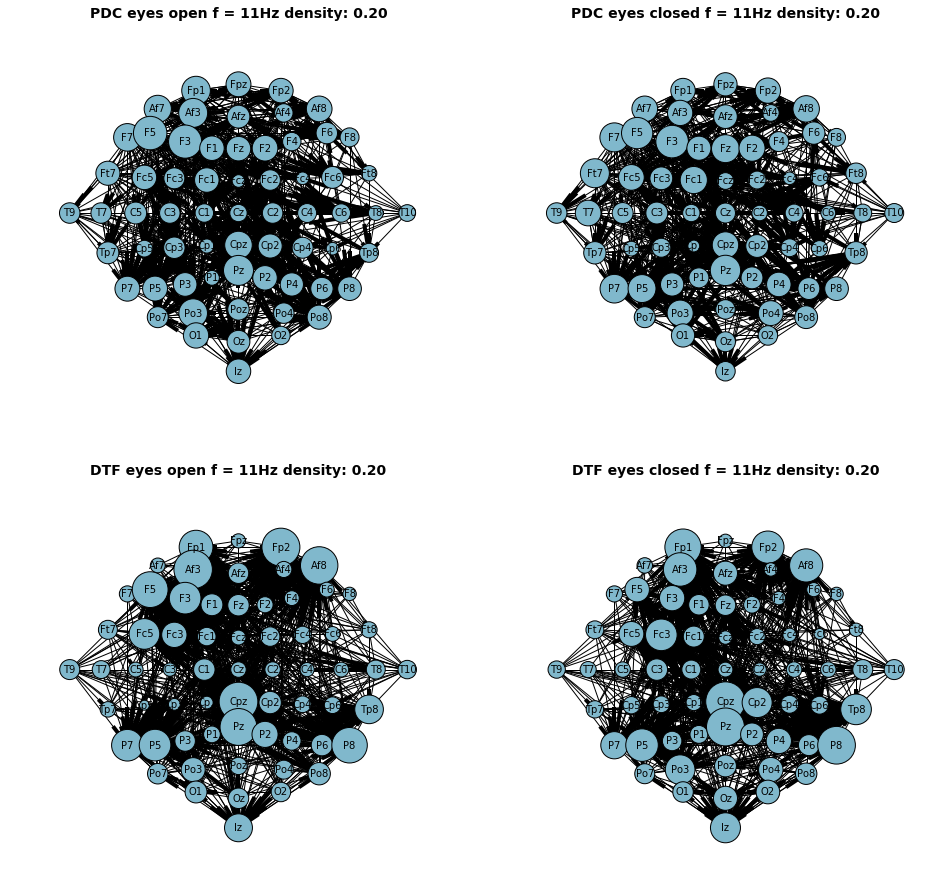

In [50]:
nc = (.5,.72,.8,1)
channel_locations = pd.read_csv('D:/DataScience/BI/HW03/channel_locations.txt', sep='\t')
#ch19 = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']
pos = {n: (channel_locations['x'][n],channel_locations['y'][n]) for n in range(64)}

plt.figure(figsize=(16, 15))

plt.subplot(221)
plt.xlim(-.6,.6)
A = adjacency_matrix(o_pdc,freq,.20)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: olabels[i] for i in range(len(olabels))}
node_size = [G.degree(node)*20 for node in range(64)]
nx.draw(G, pos, node_size = node_size, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes open f = '+str(freq)+'Hz density: 0.20', fontsize=14, fontweight='bold')
          
plt.subplot(222)
plt.xlim(-.6,.6)
A = adjacency_matrix(c_pdc,freq,.20)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: clabels[i] for i in range(len(clabels))}
node_size = [G.degree(node)*20 for node in range(64)]
nx.draw(G, pos, node_size = node_size, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('PDC eyes closed f = '+str(freq)+'Hz density: 0.20', fontsize=14, fontweight='bold')
          
plt.subplot(223)
plt.xlim(-.6,.6)
A = adjacency_matrix(o_dtf,freq,.20)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: olabels[i] for i in range(len(olabels))}
node_size = [G.degree(node)*20 for node in range(64)]
nx.draw(G, pos, node_size = node_size, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('DTF eyes open f = '+str(freq)+'Hz density: 0.20', fontsize=14, fontweight='bold')

plt.subplot(224)
plt.xlim(-.6,.6)
A = adjacency_matrix(c_dtf,freq,.20)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
labels = {i: clabels[i] for i in range(len(clabels))}
node_size = [G.degree(node)*20 for node in range(64)]
nx.draw(G, pos, node_size = node_size, node_color = nc)
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.title('DTF eyes closed f = '+str(freq)+'Hz density: 0.20', fontsize=14, fontweight='bold')

plt.savefig('D:/DataScience/BI/HW03/3.5-local_indices.eps') 
plt.savefig('D:/DataScience/BI/HW03/3.5-local_indices.png') 
plt.show()

# 3.6 (class ‘B’) Compare the networks obtained with the analysis 2.6 in terms of graph indices.

In [51]:
freq2 = 20

names = ['PDC eyes open', 'PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
M = [o_pdc, c_pdc, o_dtf, c_dtf]
d_global2 = {'': [], 'Clustering Coefficient': [], 'Path Length': []}
G2 = [] 

for m in range(4):
    A = adjacency_matrix(M[m],freq,density)
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
    G_undirected = G.to_undirected()
    
    d_global2[''] += [names[m]+' '+str(density*100)+'%']
    d_global2['Clustering Coefficient'] += [nx.average_clustering(G_undirected)]
    pl = [sum(x.values()) for x in nx.shortest_path_length(G).values()] # shortest path lengths
    d_global2['Path Length'] += [sum(pl)/(len(G.nodes())*(len(G.nodes())-1))]
    G2 += [G]

d_global2 = pd.DataFrame(d_global2)

0.061 0.501488095238
0.061 0.499007936508
0.047 0.495535714286
0.051 0.500248015873


In [52]:
sigma = []
omega = []
for g in G2:
    # random
    din = list(g.in_degree().values())
    dout = list(g.out_degree().values())
    Cr = []
    Lr = []
    for _ in range(50):
        Gr = nx.directed_configuration_model(din,dout,create_using=nx.DiGraph())
        GrU = Gr.to_undirected()
        Cr += [nx.average_clustering(GrU)]
        Lr += [nx.average_shortest_path_length(Gr)]
        
    # lattice
    Gl = nx.from_numpy_matrix(bct.makeringlatticeCIJ(64, len(g.edges())), create_using=nx.DiGraph())
    GlU = Gl.to_undirected()
    
    Cr = np.mean(Cr)
    Lr = np.mean(Lr)
    Cl = nx.average_clustering(GlU)
    
    sigma += [np.array(d_global2.loc[0,'Clustering Coefficient']/Cr)/np.array(d_global2.loc[0,'Path Length']/Lr)]
    omega += [np.array(Lr/d_global2.loc[0,'Path Length'])-np.array(d_global2.loc[0,'Clustering Coefficient']/Cl)]

d_global2['Small World Coefficient'] = sigma
d_global2['Small World Measurement'] = omega

In [53]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.6-global_indices_20HZ.xlsx')
d_global2.to_excel(writer, 'Sheet1', index = False)
writer.save()

In [54]:
DFs = [d_global, d_global2[['Clustering Coefficient','Path Length','Small World Coefficient','Small World Measurement']]]
names = ['11 HZ','20 HZ']
header = [np.array(['']+[names[0]]*4+[names[1]]*4), np.array(['']+list(DFs[0].columns)[1:]*2)]
d = pd.DataFrame(pd.concat(DFs, axis=1).values, columns = header)
d

11 HZ                                      \
                   Clustering Coefficient Path Length Small World Coefficient   
0    PDC eyes open               0.502314     2.10466                  1.3042   
1  PDC eyes closed               0.546581     2.12426                 1.36401   
2    DTF eyes open               0.776795    0.714534                0.499761   
3  DTF eyes closed               0.723197     1.09077                0.647261   

                                           20 HZ              \
  Small World Measurement Clustering Coefficient Path Length   
0               -0.106823               0.804934     1.53919   
1              -0.0559422               0.809789     1.53323   
2               -0.485618               0.831064      1.4308   
3               -0.383796               0.831925     1.30233   

                                                   
  Small World Coefficient Small World Measurement  
0                 1.37237               -0.193606  
1                 1.37874               -0.194928  
2                 1.25146               -0.262191  
3                 1.25067               -0.262173

In [55]:
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{lllllllll}
\toprule
                 &                  11 HZ &             &                         &                         &                  20 HZ &             &                         &                         \\
                 & Clustering Coefficient & Path Length & Small World Coefficient & Small World Measurement & Clustering Coefficient & Path Length & Small World Coefficient & Small World Measurement \\
\midrule
   PDC eyes open &               0.502314 &     2.10466 &                  1.3042 &               -0.106823 &               0.804934 &     1.53919 &                 1.37237 &               -0.193606 \\
 PDC eyes closed &               0.546581 &     2.12426 &                 1.36401 &              -0.0559422 &               0.809789 &     1.53323 &                 1.37874 &               -0.194928 \\
   DTF eyes open &               0.776795 &    0.714534 &                0.499761 &               -0.485618 &               0.831064 &      1.4308 

In [56]:
# pdc
d_local_o_pdc2 = {'channel': olabels,'degree': list(Go_pdc.degree().values()), 
                 'in degree': list(G2[0].in_degree().values()), 'out degree': list(Go_pdc.out_degree().values())}
d_local_o_pdc2 = pd.DataFrame(d_local_o_pdc2)
d_local_o_pdc2 = d_local_o_pdc.sort_values('degree', ascending = False).reset_index(drop=True)

d_local_c_pdc2 = {'channel': clabels,'degree': list(Gc_pdc.degree().values()), 
                 'in degree': list(G2[1].in_degree().values()), 'out degree': list(Gc_pdc.out_degree().values())}
d_local_c_pdc2 = pd.DataFrame(d_local_c_pdc2)
d_local_c_pdc2 = d_local_c_pdc.sort_values('degree', ascending = False).reset_index(drop=True)

# dtf
d_local_o_dtf2 = {'channel': olabels,'degree': list(Go_dtf.degree().values()), 
                 'in degree': list(G2[2].in_degree().values()), 'out degree': list(Go_dtf.out_degree().values())}
d_local_o_dtf2 = pd.DataFrame(d_local_o_dtf2)
d_local_o_dtf2 = d_local_o_dtf.sort_values('degree', ascending = False).reset_index(drop=True)

d_local_c_dtf2 = {'channel': clabels,'degree': list(Gc_dtf.degree().values()), 
                 'in degree': list(G2[3].in_degree().values()), 'out degree': list(Gc_dtf.out_degree().values())}
d_local_c_dtf2 = pd.DataFrame(d_local_c_dtf2)
d_local_c_dtf2 = d_local_c_dtf.sort_values('degree', ascending = False).reset_index(drop=True)

In [57]:
DFs = [d_local_o_pdc2[:10], d_local_c_pdc2[:10], d_local_o_dtf2[:10], d_local_c_dtf2[:10]]
names = ['PDC eyes open','PDC eyes closed','DTF eyes open','DTF eyes closed']
header = [np.array([names[0]]*4+[names[1]]*4+[names[2]]*4+[names[3]]*4), np.array(list(DFs[0].columns)*4)]
d = pd.DataFrame(pd.concat(DFs, axis=1).values, columns = header)
d

PDC eyes open                             PDC eyes closed                   \
        channel degree in degree out degree         channel degree in degree   
0            F5     56        11         45              F3     53        11   
1            F3     55        11         44              F5     49         9   
2            Pz     45        35         10              Pz     46        36   
3           Af3     42        15         27              F7     42         0   
4           Po3     41        26         15             Ft7     42         1   
5           Fp1     41        15         26              P7     41        26   
6           Cpz     38        36          2              P5     39        24   
7            F7     38         0         38              Fz     39        29   
8           Af7     37         7         30             Fc1     37        23   
9           Af8     33        17         16             Cpz     35        33   

             DTF eyes open                             DTF eyes closed         \
  out degree       channel degree in degree out degree         channel degree   
0         42           Cpz     75        63         12             Cpz     78   
1         40           Af3     74        63         11              Pz     72   
2         10           Fp2     72        61         11              P8     71   
3         42           Af8     70        62          8             Fp1     66   
4         41            Pz     68        58         10             Af3     56   
5         15            F5     64        54         10             Af8     55   
6         15            P8     63        43         20              P5     53   
7         10           Fp1     57        42         15             Fp2     52   
8         14            P5     50        35         15             Fc3     50   
9          2            P7     50        34         16             Tp8     47   

                        
  in degree out degree  
0        63         15  
1        57         15  
2        51         20  
3        57          9  
4        48          8  
5        46          9  
6        37         16  
7        41         11  
8        39         11  
9        30         17

In [59]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.6-local_indices_20HZ.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{llllllllllllllll}
\toprule
PDC eyes open &        &           &            & PDC eyes closed &        &           &            & DTF eyes open &        &           &            & DTF eyes closed &        &           &            \\
      channel & degree & in degree & out degree &         channel & degree & in degree & out degree &       channel & degree & in degree & out degree &         channel & degree & in degree & out degree \\
\midrule
           F5 &     56 &        11 &         45 &              F3 &     53 &        11 &         42 &           Cpz &     75 &        63 &         12 &             Cpz &     78 &        63 &         15 \\
           F3 &     55 &        11 &         44 &              F5 &     49 &         9 &         40 &           Af3 &     74 &        63 &         11 &              Pz &     72 &        57 &         15 \\
           Pz &     45 &        35 &         10 &              Pz &     46 &        36 &         10 &           Fp2 &     72 &  

0.115 0.201388888889
0.12 0.203621031746
0.115 0.202132936508
0.121 0.204365079365
0.113 0.203373015873
0.117 0.203373015873
0.101 0.204365079365
0.121 0.201636904762


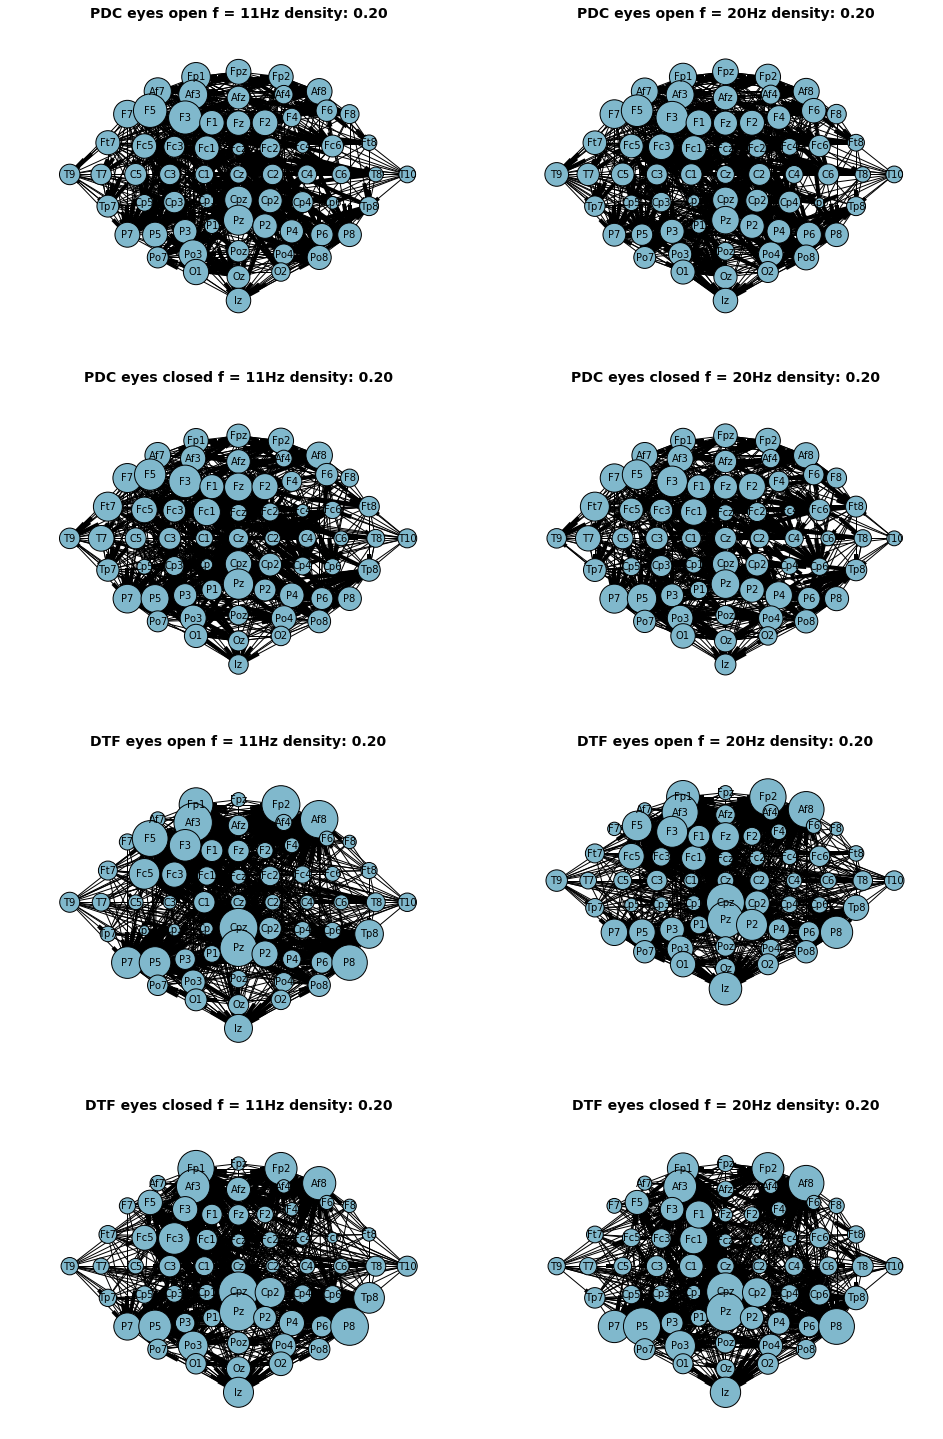

In [60]:
plt.figure(figsize=(16, 25))

names = ['PDC eyes open', 'PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
M = [o_pdc, c_pdc, o_dtf, c_dtf]
idx = 1
for m in range(4):
    for f in [freq,freq2]:
        plt.subplot(420+idx)
        plt.xlim(-.6,.6)
        A = adjacency_matrix(M[m],f,.20)
        G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
        labels = {i: olabels[i] for i in range(len(olabels))}
        node_size = [G.degree(node)*20 for node in range(64)]
        nx.draw(G, pos, node_size = node_size, node_color = nc)
        nx.draw_networkx_labels(G, pos, labels, font_size=10)
        plt.title(names[m]+' f = '+str(f)+'Hz density: 0.20', fontsize=14, fontweight='bold')
        idx += 1
        
plt.savefig('D:/DataScience/BI/HW03/3.6-local_indices20HZ.eps') 
plt.savefig('D:/DataScience/BI/HW03/3.6-local_indices20HZ.png') 
plt.show()

# 3.7 (class ‘C’) Perform point 3.1 considering the weighted version of the graph indices definitions.

In [66]:
# global indices

names = ['PDC eyes open', 'PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
M = [o_pdc, c_pdc, o_dtf, c_dtf]
d_global3 = {'': [], 'Clustering Coefficient': [], 'Path Length': []}
G3 = [] 

for m in range(4):
    G = nx.from_numpy_matrix(M[m][freq], create_using=nx.DiGraph())
    G_undirected = G.to_undirected()
    
    d_global3[''] += [names[m]]
    d_global3['Clustering Coefficient'] += [nx.average_clustering(G_undirected,weight='weight')]
    pl = [sum(x.values()) for x in nx.shortest_path_length(G,weight='weight').values()] # shortest path lengths
    d_global3['Path Length'] += [sum(pl)/(len(G.nodes())*(len(G.nodes())-1))]
    G3 += [G]

d_global3 = pd.DataFrame(d_global3)
d_global3

,,Clustering Coefficient,Path Length
0,PDC eyes open,0.139434,0.029360
1,PDC eyes closed,0.163047,0.030512
2,DTF eyes open,0.091333,0.032703
3,DTF eyes closed,0.084077,0.030081


In [65]:
len(G.edges())
#64*64

4032

In [82]:
DFs = [d_global.iloc[:,:3], d_global3[['Clustering Coefficient','Path Length']]]
names = ['20% density graph','weighted graph']
header = [np.array(['']+[names[0]]*2+[names[1]]*2), np.array(list(DFs[0].columns)[:3]+list(DFs[0].columns)[1:])]
d = pd.DataFrame(pd.concat(DFs, axis=1).values, columns = header)
d

20% density graph                     weighted graph  \
                   Clustering Coefficient Path Length Clustering Coefficient   
0    PDC eyes open               0.502314     2.10466               0.139434   
1  PDC eyes closed               0.546581     2.12426               0.163047   
2    DTF eyes open               0.776795    0.714534              0.0913334   
3  DTF eyes closed               0.723197     1.09077              0.0840769   

               
  Path Length  
0   0.0293599  
1   0.0305121  
2   0.0327027  
3   0.0300813

In [83]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.7-global_indices_weighted.xlsx')
d_global3.to_excel(writer, 'Sheet1')
writer.save()
for i in d.to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{lllll}
\toprule
                 &      20\% density graph &             &         weighted graph &             \\
                 & Clustering Coefficient & Path Length & Clustering Coefficient & Path Length \\
\midrule
   PDC eyes open &               0.502314 &     2.10466 &               0.139434 &   0.0293599 \\
 PDC eyes closed &               0.546581 &     2.12426 &               0.163047 &   0.0305121 \\
   DTF eyes open &               0.776795 &    0.714534 &              0.0913334 &   0.0327027 \\
 DTF eyes closed &               0.723197 &     1.09077 &              0.0840769 &   0.0300813 \\
\bottomrule
\end{tabular}



In [84]:
# local indices
DFw = []

for df in range(4):
    d = {'channel': olabels,'degree': list(G3[df].degree(weight='weight').values()), 
         'in degree': list(G3[df].in_degree(weight='weight').values()), 'out degree': list(G3[df].out_degree(weight='weight').values())}
    DFw += [pd.DataFrame(d).sort_values('degree', ascending = False).reset_index(drop=True)]

In [87]:
# 0: pdc open, 1: pdc closed, 2: dtf open, 3: dtf closed
DFw[0]
names = ['PDC eyes open','PDC eyes closed', 'DTF eyes open', 'DTF eyes closed']
header = [np.array([names[0]]*4+[names[1]]*4+[names[2]]*4+[names[3]]*4), np.array(list(DFw[0].columns)*4)]
d = pd.DataFrame(pd.concat(DFw, axis=1).values, columns = header)
d[:10]

PDC eyes open                               PDC eyes closed           \
        channel   degree in degree out degree         channel   degree   
0            F3  15.5282   5.65479    9.87342              F3   13.513   
1            F5  14.8561   5.20601    9.65007              F5   12.682   
2           Af3   12.399   5.80203    6.59701              F7  12.0049   
3            Pz  11.8849   7.43647    4.44846              Pz   11.858   
4           Fp1  11.5868   5.16579    6.42096             Af8  11.8133   
5            P7  11.2307   6.59906    4.63161             Af7  11.7299   
6            P5  11.1986   6.64934    4.54929             Fc1  11.5504   
7            Fz  11.1426   6.51017    4.63239             Af3   11.301   
8            P2  11.0032   6.58518    4.41802             Po3  11.0462   
9           Af8  10.9529   5.73304    5.21989              P4  11.0241   

                       DTF eyes open                                \
  in degree out degree       channel   degree in degree out degree   
0   4.82475    8.68821           Cpz  35.4409   31.2088    4.23211   
1   4.14385    8.53818            Pz  22.2483   18.2033    4.04495   
2   1.07865    10.9263           Af3  21.2813   16.6807    4.60063   
3   7.51324    4.34475           Af8  17.1591   13.3641    3.79494   
4    6.3088    5.50446            F5  17.0496   12.0906    4.95905   
5   4.03968    7.69022           Fp2   16.922   12.6282    4.29381   
6   6.12647    5.42396           Fp1  14.6732   9.61241    5.06075   
7   5.08558    6.21545            F3  14.0791   9.22684     4.8523   
8   6.61714    4.42908            P8  13.3369      7.87     5.4669   
9   6.69195    4.33215            P7  12.8484   7.37468    5.47376   

  DTF eyes closed                                
          channel   degree in degree out degree  
0             Cpz  42.4753   38.2106    4.26473  
1              Pz  23.1525   18.7967    4.35576  
2             Fp1  16.2703   11.6051    4.66523  
3             Fp2  14.0959   9.41786      4.678  
4              P5  13.9813   8.61206    5.36927  
5              P8  13.9144   8.02437    5.89003  
6             Tp8  13.4227   8.03364    5.38901  
7             Af3  13.2404   8.81693    4.42351  
8             Af8  13.0833    8.7218    4.36153  
9             Po3  12.1019   7.16211    4.93983

In [86]:
writer = pd.ExcelWriter('D:/DataScience/BI/HW03/3.7-local_indices_weighted.xlsx')
d.to_excel(writer, 'Sheet1')
writer.save()
for i in d[:10].to_latex(index = False).split('\n'): print(i.replace('\\textbackslashn',''))

\begin{tabular}{llllllllllllllll}
\toprule
PDC eyes open &          &           &            & PDC eyes closed &          &           &            & DTF eyes open &          &           &            & DTF eyes closed &          &           &            \\
      channel &   degree & in degree & out degree &         channel &   degree & in degree & out degree &       channel &   degree & in degree & out degree &         channel &   degree & in degree & out degree \\
\midrule
           F3 &  15.5282 &   5.65479 &    9.87342 &              F3 &   13.513 &   4.82475 &    8.68821 &           Cpz &  35.4409 &   31.2088 &    4.23211 &             Cpz &  42.4753 &   38.2106 &    4.26473 \\
           F5 &  14.8561 &   5.20601 &    9.65007 &              F5 &   12.682 &   4.14385 &    8.53818 &            Pz &  22.2483 &   18.2033 &    4.04495 &              Pz &  23.1525 &   18.7967 &    4.35576 \\
          Af3 &   12.399 &   5.80203 &    6.59701 &              F7 &  12.0049 &   1.07865 &    